<a href="https://colab.research.google.com/github/Brayan8Ch/-proyectodg/blob/master/challenge_dg_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación del dataset

In [103]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as ms 
import matplotlib.pyplot as plt


# Cargar el dataset
url = "https://raw.githubusercontent.com/Brayan8Ch/-proyectodg/refs/heads/master/StudentsPerformance.csv"
df = pd.read_csv(url)

print("Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape}")
df.head()

Dataset cargado exitosamente
Dimensiones: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Análisis de datos

In [104]:
print("\n1️⃣ INFORMACIÓN BÁSICA DEL DATASET")
print("-"*40)
print(f"📏 Dimensiones: {df.shape}")
print(f"📋 Variables: {df.columns.tolist()}")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 1.2 Tipos de datos y valores únicos
print("\n📋 TIPOS DE DATOS Y VALORES ÚNICOS:")
for col in df.columns:
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    print(f"• {col}: {dtype} ({unique_count} valores únicos)")


1️⃣ INFORMACIÓN BÁSICA DEL DATASET
----------------------------------------
📏 Dimensiones: (1000, 8)
📋 Variables: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
💾 Memoria utilizada: 303.71 KB

📋 TIPOS DE DATOS Y VALORES ÚNICOS:
• gender: object (2 valores únicos)
• race/ethnicity: object (5 valores únicos)
• parental level of education: object (6 valores únicos)
• lunch: object (2 valores únicos)
• test preparation course: object (2 valores únicos)
• math score: int64 (81 valores únicos)
• reading score: int64 (72 valores únicos)
• writing score: int64 (77 valores únicos)


In [105]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


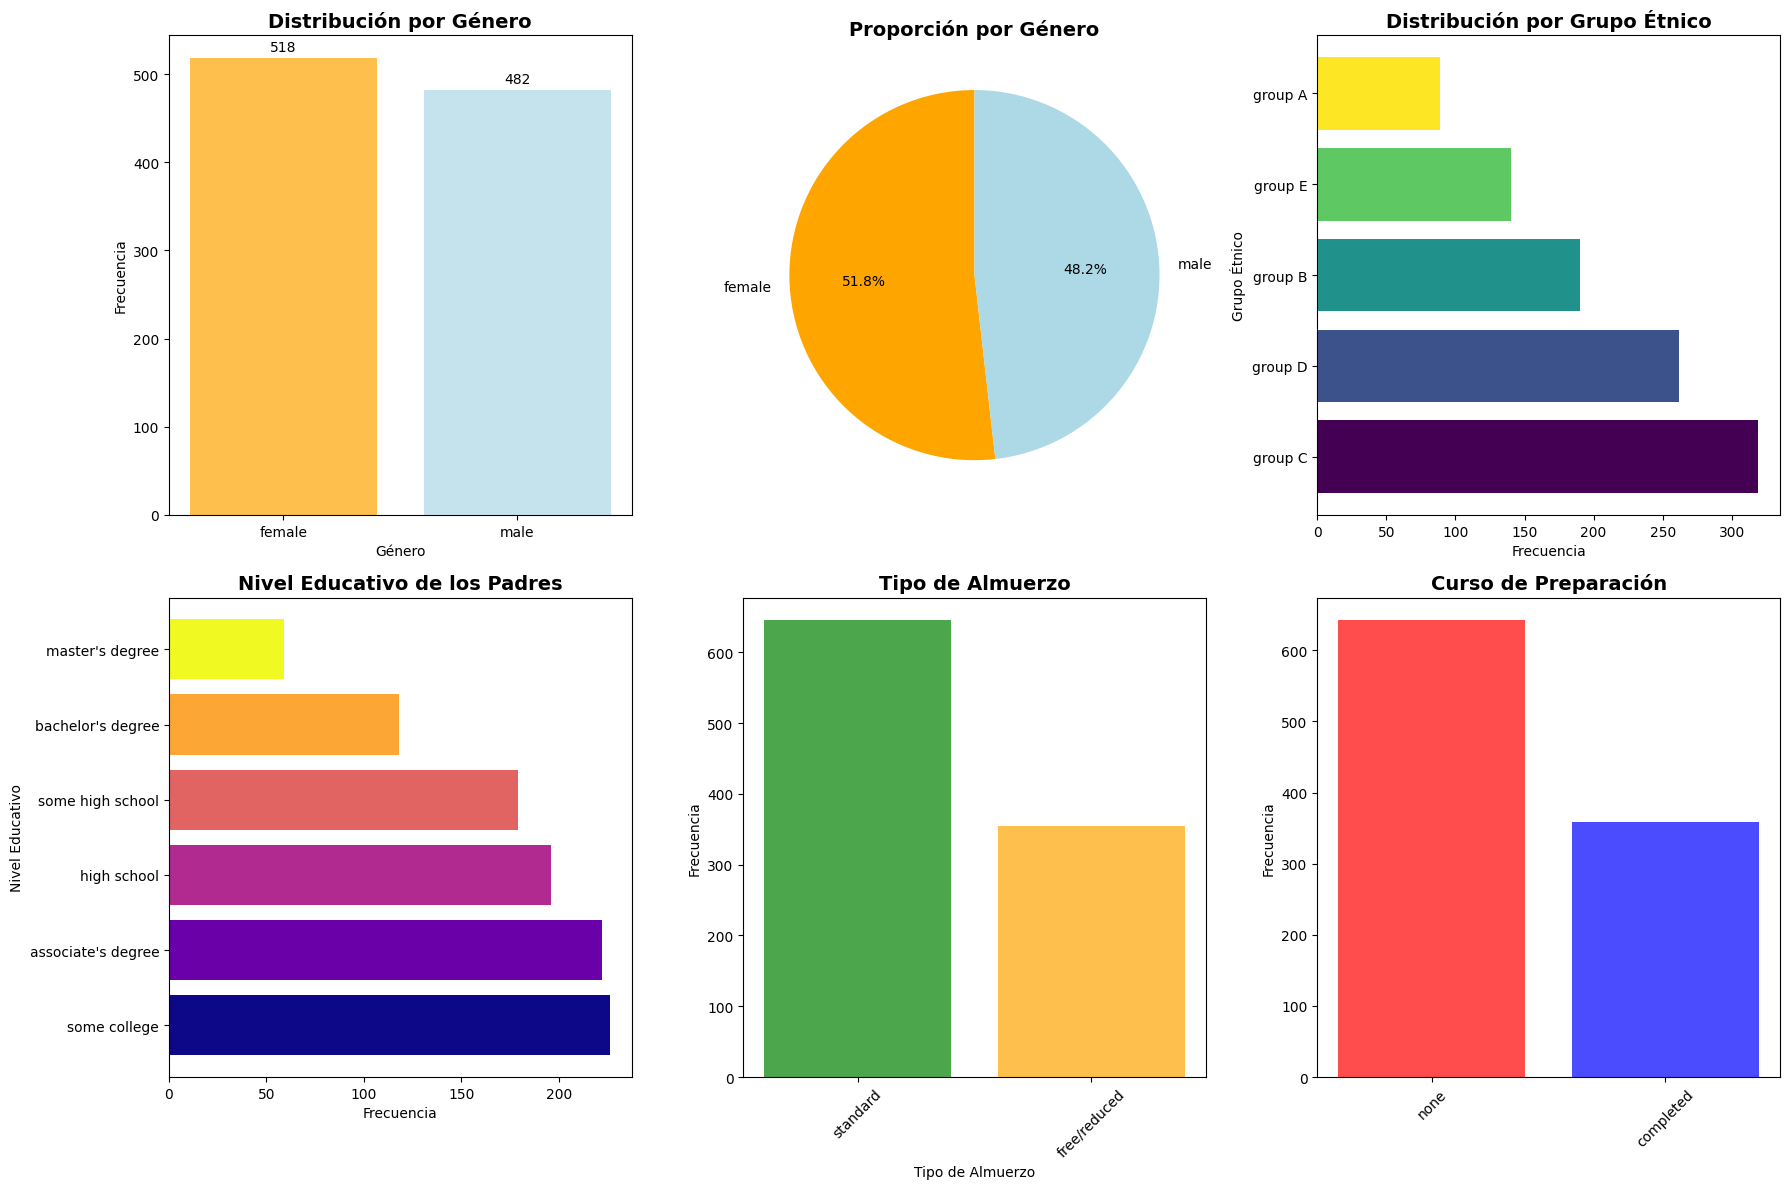

In [106]:
# Preparar conteos de cada variable categórica
gender_counts = df['gender'].value_counts()
race_counts = df['race/ethnicity'].value_counts()
education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
prep_counts = df['test preparation course'].value_counts()

# Crear figura con subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# --- Gráfico 1: Distribución por Género (Bar)
bars = axs[0, 0].bar(gender_counts.index, gender_counts.values, 
                     color=['orange', 'lightblue'], alpha=0.7)
axs[0, 0].set_title('Distribución por Género', fontsize=14, fontweight='bold')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_xlabel('Género')
for bar in bars:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height)}', ha='center', va='bottom')

# --- Gráfico 2: Proporción por Género (Pie)
axs[0, 1].pie(gender_counts.values, labels=gender_counts.index, 
              autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
axs[0, 1].set_title('Proporción por Género', fontsize=14, fontweight='bold')

# --- Gráfico 3: Distribución por Raza/Etnicidad (Bar horizontal)
bars = axs[0, 2].barh(race_counts.index, race_counts.values, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(race_counts))))
axs[0, 2].set_title('Distribución por Grupo Étnico', fontsize=14, fontweight='bold')
axs[0, 2].set_xlabel('Frecuencia')
axs[0, 2].set_ylabel('Grupo Étnico')

# --- Gráfico 4: Nivel Educativo de los Padres (Bar horizontal)
bars = axs[1, 0].barh(education_counts.index, education_counts.values,
                      color=plt.cm.plasma(np.linspace(0, 1, len(education_counts))))
axs[1, 0].set_title('Nivel Educativo de los Padres', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Frecuencia')
axs[1, 0].set_ylabel('Nivel Educativo')

# --- Gráfico 5: Tipo de Almuerzo (Bar)
bars = axs[1, 1].bar(lunch_counts.index, lunch_counts.values,
                     color=['green', 'orange'], alpha=0.7)
axs[1, 1].set_title('Tipo de Almuerzo', fontsize=14, fontweight='bold')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_xlabel('Tipo de Almuerzo')
axs[1, 1].tick_params(axis='x', rotation=45)

# --- Gráfico 6: Curso de Preparación (Bar)
bars = axs[1, 2].bar(prep_counts.index, prep_counts.values,
                     color=['red', 'blue'], alpha=0.7)
axs[1, 2].set_title('Curso de Preparación', fontsize=14, fontweight='bold')
axs[1, 2].set_ylabel('Frecuencia')
axs[1, 2].tick_params(axis='x', rotation=45)

# Ajustar layout para que no se superpongan los títulos y etiquetas
plt.tight_layout()
plt.show()

# Identificación de datos nulos

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


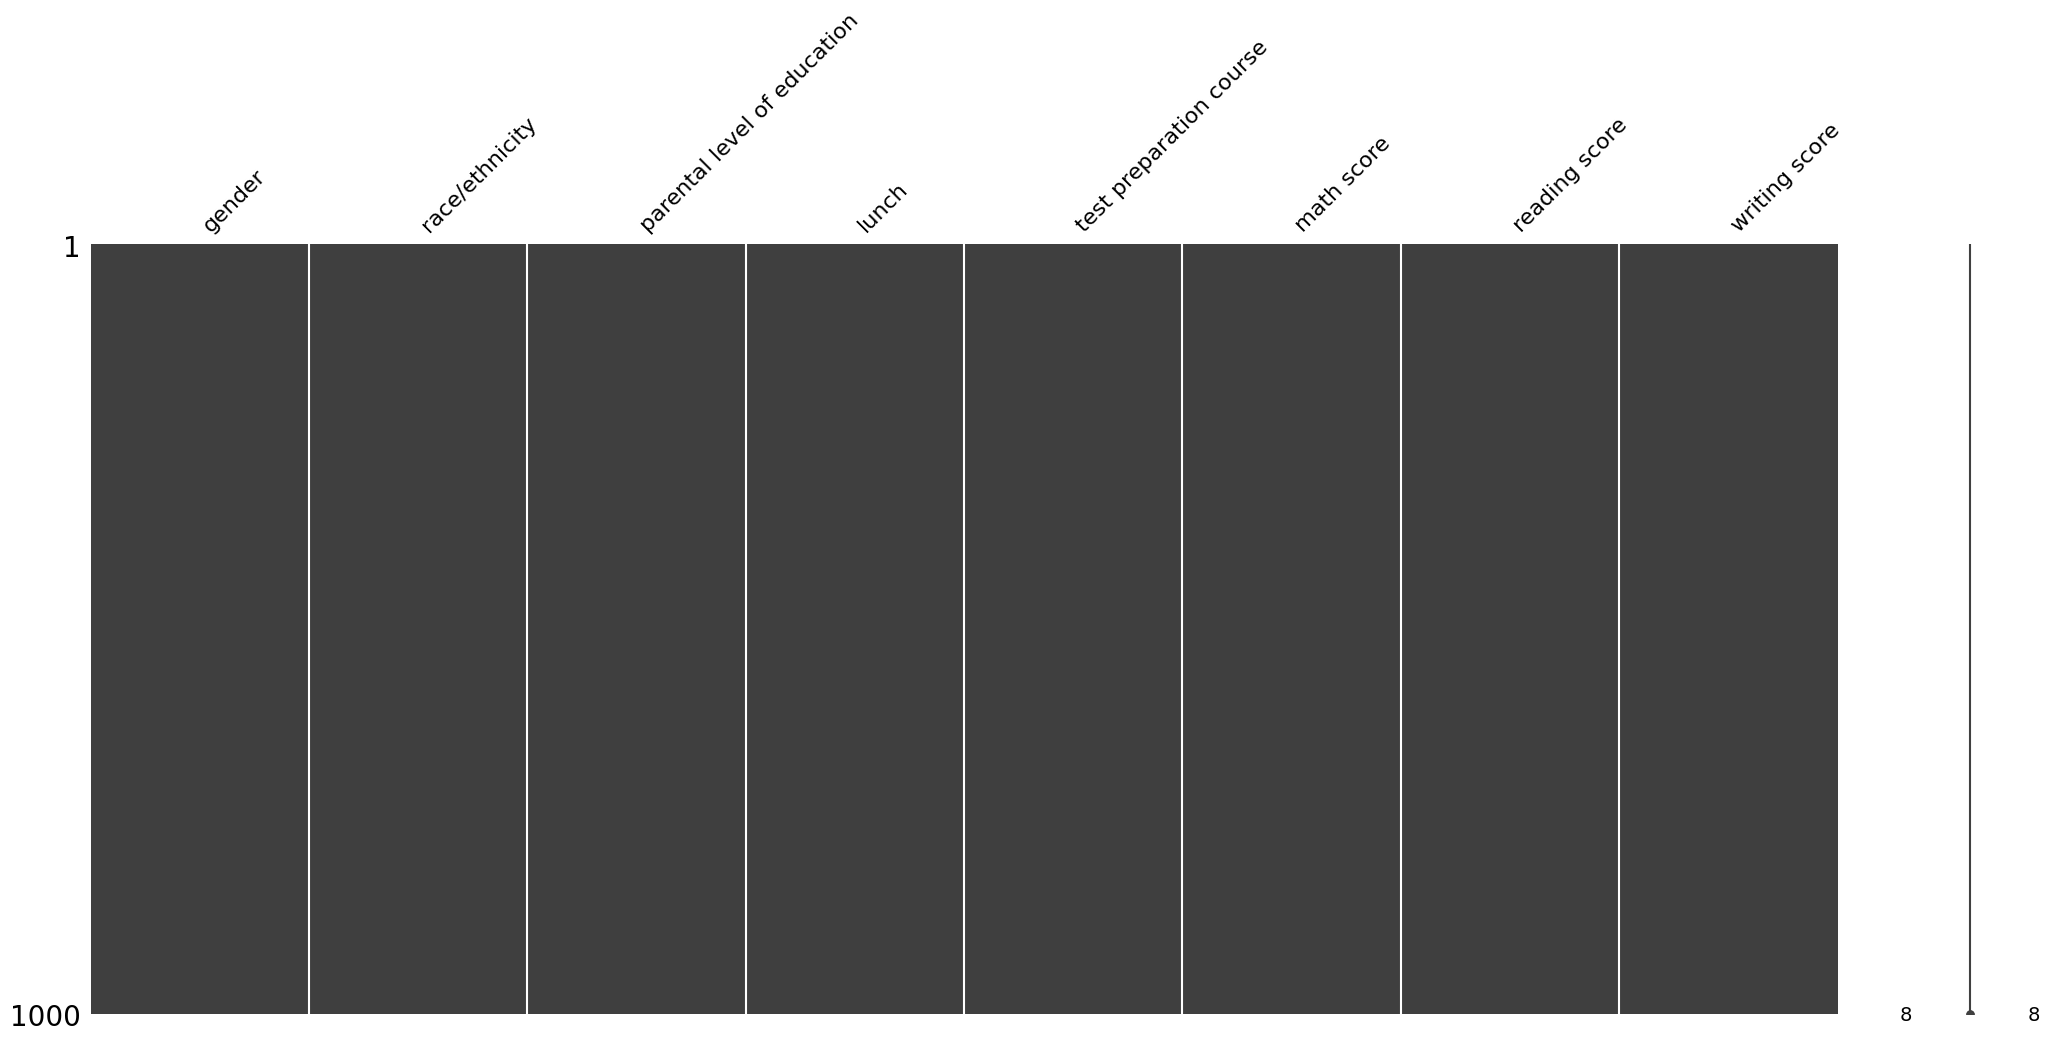

In [107]:
# Identificación de datos nulos
ms.matrix(df) # Visualización de datos nulos
print(df.isnull().sum()) # Identificación de datos nulos con pandas

# Identificación de datos duplicados

In [108]:
# Identificación de datos duplicados
duplicates = df.duplicated().value_counts()
duplicates

False    1000
Name: count, dtype: int64

# Identificación de outliers

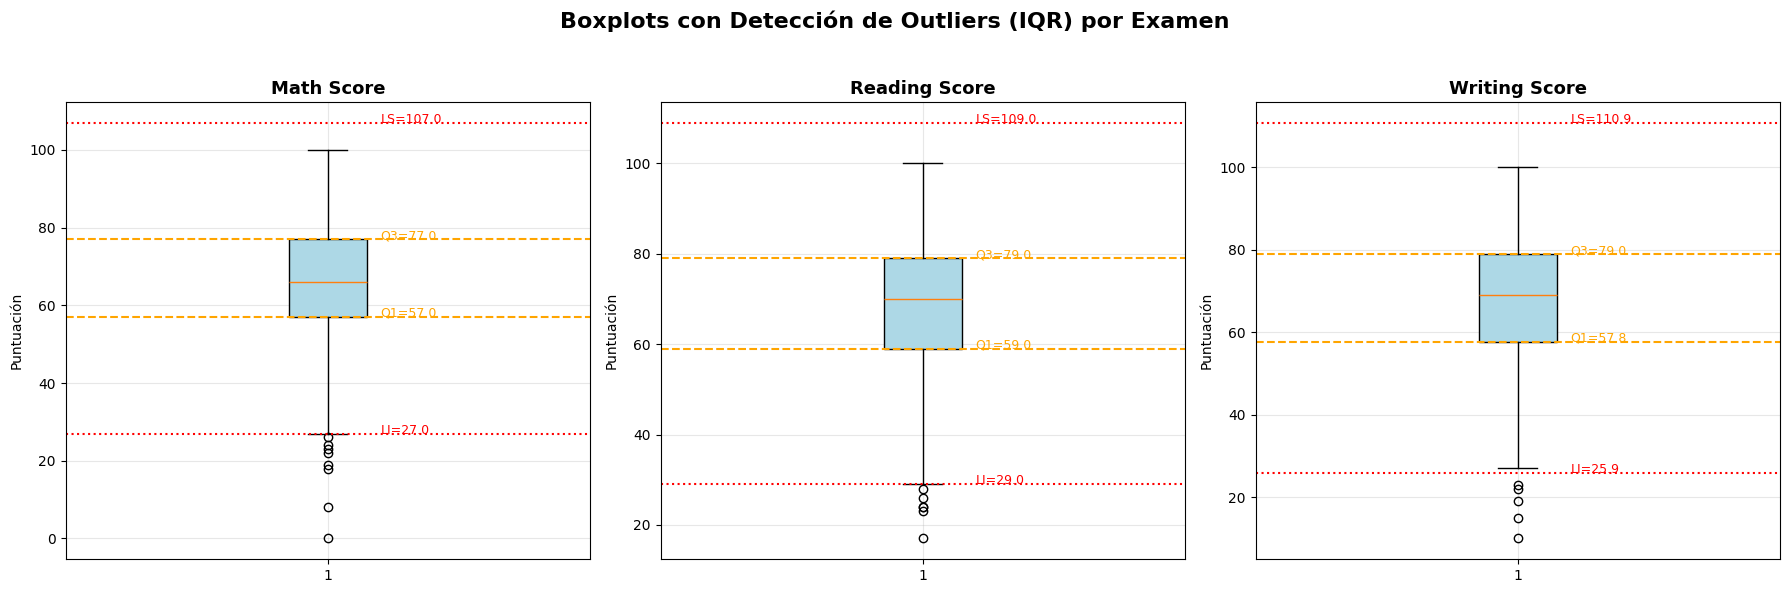

  MATH SCORE:
   • Outliers detectados: 8 (0.80%)
   • Rango normal: 27.0 - 100.0
   • Valores atípicos: [np.int64(0), np.int64(8), np.int64(18), np.int64(19), np.int64(22), np.int64(23), np.int64(24), np.int64(26)]
   • Menor outlier: 0.0
   • Mayor outlier: 26.0
  READING SCORE:
   • Outliers detectados: 6 (0.60%)
   • Rango normal: 29.0 - 100.0
   • Valores atípicos: [np.int64(17), np.int64(23), np.int64(24), np.int64(26), np.int64(28)]
   • Menor outlier: 17.0
   • Mayor outlier: 28.0
  WRITING SCORE:
   • Outliers detectados: 5 (0.50%)
   • Rango normal: 25.9 - 100.0
   • Valores atípicos: [np.int64(10), np.int64(15), np.int64(19), np.int64(22), np.int64(23)]
   • Menor outlier: 10.0
   • Mayor outlier: 23.0


In [109]:

# Configurar nombres de columnas
scores = ['math score', 'reading score', 'writing score']

# Crear figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, score in enumerate(scores):
    # Calcular IQR y límites de outliers
    Q1 = df[score].quantile(0.25)
    Q3 = df[score].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Crear boxplot individual
    axs[i].boxplot(df[score], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[i].set_title(f'{score.title()}', fontsize=13, fontweight='bold')
    axs[i].set_ylabel('Puntuación')
    axs[i].grid(True, alpha=0.3)
    
    # Anotar IQR, Q1, Q3 y límites en el gráfico
    axs[i].axhline(Q1, color='orange', linestyle='--', label='Q1')
    axs[i].axhline(Q3, color='orange', linestyle='--', label='Q3')
    axs[i].axhline(lower_limit, color='red', linestyle=':', label='Límite inferior')
    axs[i].axhline(upper_limit, color='red', linestyle=':', label='Límite superior')

    axs[i].text(1.1, Q1, f'Q1={Q1:.1f}', color='orange', fontsize=9)
    axs[i].text(1.1, Q3, f'Q3={Q3:.1f}', color='orange', fontsize=9)
    axs[i].text(1.1, lower_limit, f'LI={lower_limit:.1f}', color='red', fontsize=9)
    axs[i].text(1.1, upper_limit, f'LS={upper_limit:.1f}', color='red', fontsize=9)

# Título general
fig.suptitle('Boxplots con Detección de Outliers (IQR) por Examen', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

for score in scores: 
    Q1 = df[score].quantile(0.25)
    Q3 = df[score].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, df[score].min())
    upper_limit = min(Q3 + 1.5 * IQR, df[score].max())
    outliers = df[(df[score] < lower_limit) | (df[score] > upper_limit)]

    outlier_count = outliers.shape[0]
    outlier_percent = outlier_count / df.shape[0] * 100
    outlier_values = sorted(outliers[score].unique())
    min_outlier = min(outlier_values) if outlier_values else None
    max_outlier = max(outlier_values) if outlier_values else None
    print(f"  {score.upper()}:")
    print(f"   • Outliers detectados: {outlier_count} ({outlier_percent:.2f}%)")
    print(f"   • Rango normal: {lower_limit:.1f} - {upper_limit:.1f}")
    print(f"   • Valores atípicos: {outlier_values}")
    print(f"   • Menor outlier: {min_outlier:.1f}" if min_outlier is not None else "   • Menor outlier: N/A")
    print(f"   • Mayor outlier: {max_outlier:.1f}" if max_outlier is not None else "   • Mayor outlier: N/A")

# Feature Engineering

In [114]:
# Feature Engineering
# Reemplazamos los valores de la columna gender y test preparation course por valores numéricos 
df['gender'] = df['gender'].replace({'male': 0, 'female': 1})
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

# Calculamos la columna para representar la puntuación promedio de los exámenes
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,1,group B,bachelor's degree,standard,NaN,72,72,74,72.666667
1,1,group C,some college,standard,NaN,69,90,88,82.333333
2,1,group B,master's degree,standard,NaN,90,95,93,92.666667
3,0,group A,associate's degree,free/reduced,NaN,47,57,44,49.333333
4,0,group C,some college,standard,NaN,76,78,75,76.333333


# Influencias con las variables a predecir

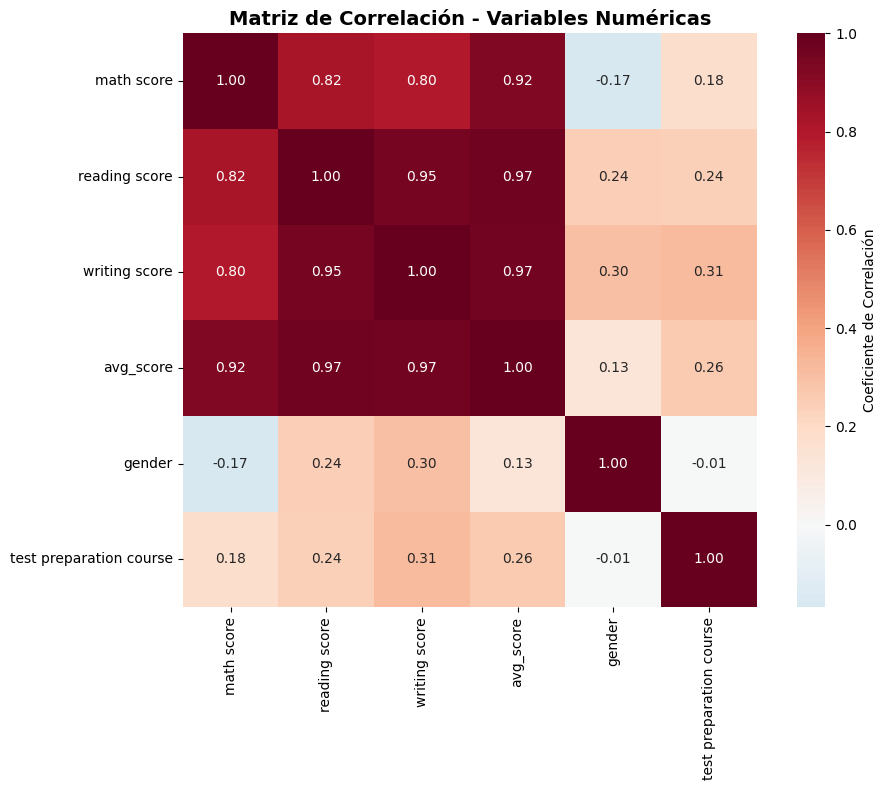

🔗 CORRELACIONES MÁS FUERTES:
• math score ↔ reading score: 0.818
• math score ↔ writing score: 0.803
• math score ↔ avg_score: 0.919
• reading score ↔ writing score: 0.955
• reading score ↔ avg_score: 0.970
• writing score ↔ avg_score: 0.966
• writing score ↔ gender: 0.301
• writing score ↔ test preparation course: 0.313


In [111]:
# 1. Matriz de correlación para variables numéricas
numeric_cols = ['math score', 'reading score', 'writing score', 'avg_score', 'gender', 'test preparation course']

# Calcular matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones más fuertes
print("🔗 CORRELACIONES MÁS FUERTES:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # Umbral de correlación moderada
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"• {var1} ↔ {var2}: {corr_value:.3f}")

## Análisis de Correlación - Variables Numéricas

Se realizó una matriz de correlación para explorar la relación entre las variables numéricas del conjunto de datos, especialmente enfocándonos en los puntajes académicos (`math score`, `reading score`, `writing score` y `avg_score`).

### Principales Hallazgos

- **Fuertes correlaciones entre puntajes académicos:**
  - `reading score` ↔ `writing score`: **0.955**
  - `reading score` ↔ `avg_score`: **0.970**
  - `writing score` ↔ `avg_score`: **0.966**
  - `math score` ↔ `avg_score`: **0.919**
  - `math score` ↔ `reading score`: **0.818**
  - `math score` ↔ `writing score`: **0.803**

  ➤ Esto indica que los estudiantes que tienen buen rendimiento en una materia suelen también rendir bien en las otras.

- **Relaciones moderadas con variables externas:**
  - `writing score` ↔ `gender`: **0.301**
  - `writing score` ↔ `test preparation course`: **0.313**

  ➤ El género y haber tomado el curso de preparación están moderadamente relacionados con el puntaje en escritura.

### Conclusión

- Las materias están altamente correlacionadas entre sí.
- El `avg_score` es una buena medida del rendimiento general.
- El curso de preparación y el género pueden influir ligeramente en los puntajes, especialmente en escritura.

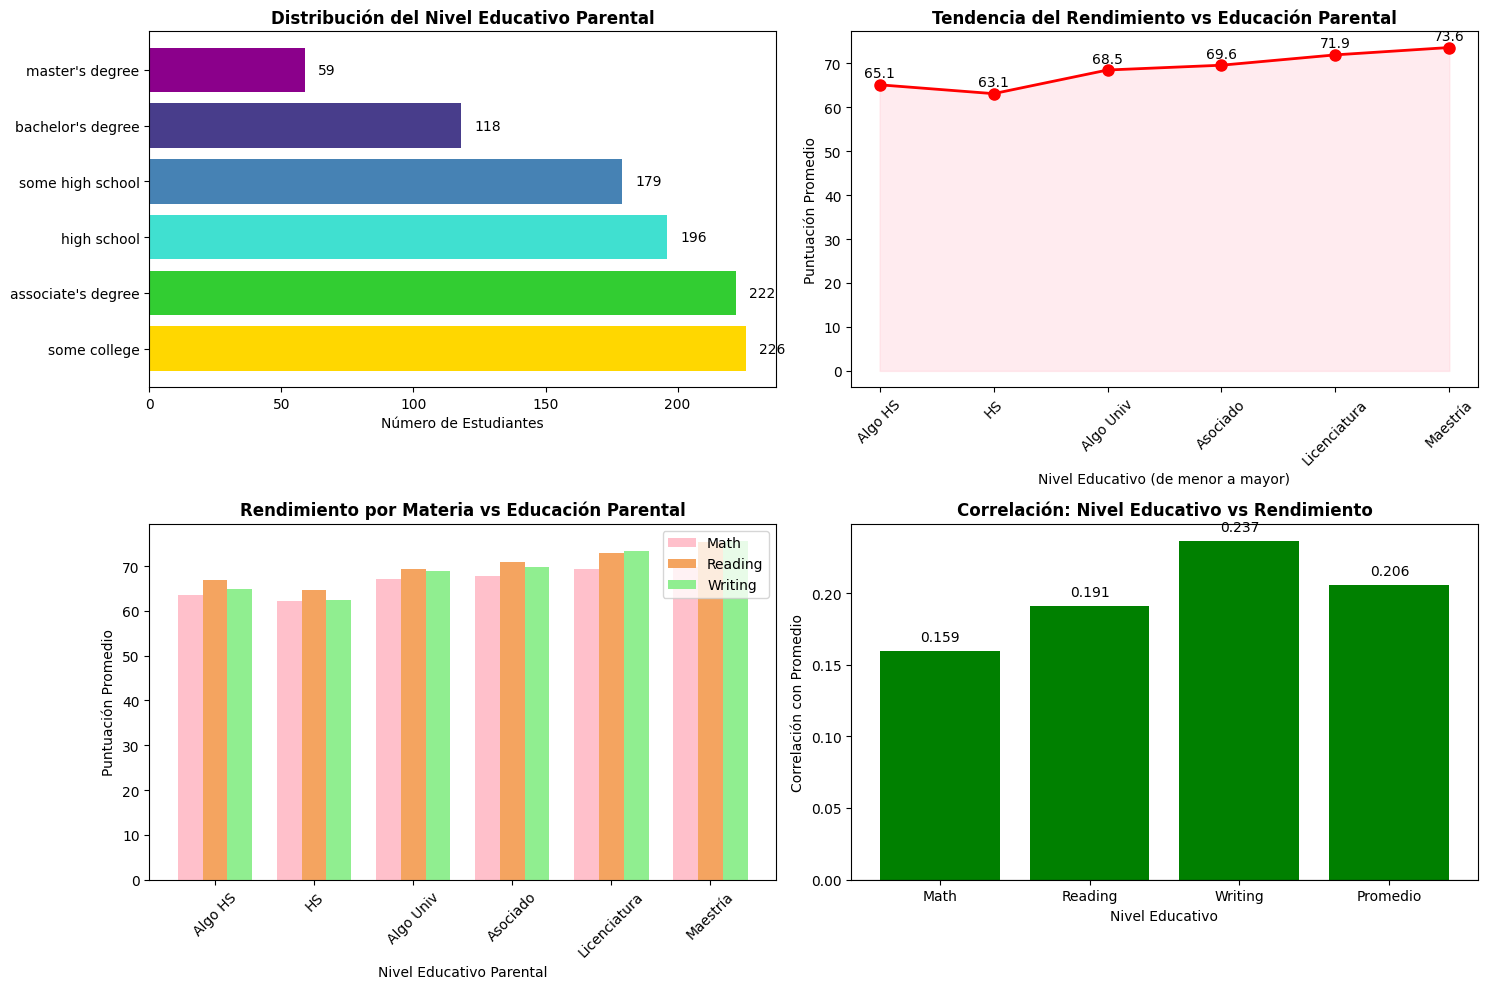

In [112]:
# Análisis del Nivel Educativo Parental y su Impacto en el Rendimiento
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución del Nivel Educativo Parental
edu_counts = df['parental level of education'].value_counts()
colors1 = ['#FFD700', '#32CD32', '#40E0D0', '#4682B4', '#483D8B', '#8B008B']
bars1 = ax1.barh(edu_counts.index, edu_counts.values, color=colors1)
ax1.set_title('Distribución del Nivel Educativo Parental', fontweight='bold')
ax1.set_xlabel('Número de Estudiantes')
for i, v in enumerate(edu_counts.values):
    ax1.text(v + 5, i, str(v), va='center')

# 2. Tendencia del Rendimiento vs Educación Parental
edu_order = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
avg_by_edu = df.groupby('parental level of education')['avg_score'].mean().reindex(edu_order)
ax2.plot(range(len(avg_by_edu)), avg_by_edu.values, 'o-', linewidth=2, markersize=8, color='red')
ax2.fill_between(range(len(avg_by_edu)), avg_by_edu.values, alpha=0.3, color='pink')
ax2.set_title('Tendencia del Rendimiento vs Educación Parental', fontweight='bold')
ax2.set_xlabel('Nivel Educativo (de menor a mayor)')
ax2.set_ylabel('Puntuación Promedio')
ax2.set_xticks(range(len(avg_by_edu)))
ax2.set_xticklabels(['Algo HS', 'HS', 'Algo Univ', 'Asociado', 'Licenciatura', 'Maestría'], rotation=45)
for i, v in enumerate(avg_by_edu.values):
    ax2.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom')

# 3. Rendimiento por Materia vs Educación Parental
subjects = ['math score', 'reading score', 'writing score']
colors3 = ['#FFC0CB', '#F4A460', '#90EE90']
x_pos = np.arange(len(edu_order))
width = 0.25
for i, subject in enumerate(subjects):
    scores_by_edu = df.groupby('parental level of education')[subject].mean().reindex(edu_order)
    ax3.bar(x_pos + i*width, scores_by_edu.values, width, label=subject.split()[0].title(), color=colors3[i])
ax3.set_title('Rendimiento por Materia vs Educación Parental', fontweight='bold')
ax3.set_xlabel('Nivel Educativo Parental')
ax3.set_ylabel('Puntuación Promedio')
ax3.set_xticks(x_pos + width)
ax3.set_xticklabels(['Algo HS', 'HS', 'Algo Univ', 'Asociado', 'Licenciatura', 'Maestría'], rotation=45)
ax3.legend()

# 4. Correlación: Nivel Educativo vs Rendimiento
edu_numeric = df['parental level of education'].map({
    'some high school': 1, 'high school': 2, 'some college': 3,
    'associate\'s degree': 4, 'bachelor\'s degree': 5, 'master\'s degree': 6
})
correlations = [edu_numeric.corr(df[subject]) for subject in subjects + ['avg_score']]
labels = ['Math', 'Reading', 'Writing', 'Promedio']
colors4 = ['green' if c > 0 else 'red' for c in correlations]
bars4 = ax4.bar(labels, correlations, color=colors4)
ax4.set_title('Correlación: Nivel Educativo vs Rendimiento', fontweight='bold')
ax4.set_ylabel('Correlación con Promedio')
ax4.set_xlabel('Nivel Educativo')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
for bar, corr in zip(bars4, correlations):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (0.005 if height > 0 else -0.015),
             f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

## Análisis del Impacto del Nivel Educativo Parental en el Rendimiento Académico

### Distribución de la Muestra
La mayor parte de los estudiantes provienen de familias con educación universitaria parcial (some college: 226 estudiantes) y título asociado (222 estudiantes), seguidos por aquellos cuyos padres completaron únicamente la preparatoria (196 estudiantes). Los niveles educativos más altos como licenciatura y maestría representan una menor proporción de la muestra.

### Tendencia del Rendimiento
Se observa una clara tendencia ascendente en el rendimiento académico conforme aumenta el nivel educativo de los padres. Los estudiantes cuyos padres tienen maestría obtienen un promedio de 73.6 puntos, mientras que aquellos con padres que solo cursaron parte de la preparatoria promedian 65.1 puntos. Esta diferencia de 8.5 puntos sugiere un impacto significativo del entorno educativo familiar.

### Rendimiento por Materia
Todas las materias siguen el mismo patrón de mejora con el nivel educativo parental, aunque con ligeras variaciones. Las puntuaciones en escritura y lectura muestran incrementos más pronunciados que matemáticas, lo que podría indicar que el ambiente familiar letrado tiene mayor influencia en habilidades verbales.

### Correlaciones
Las correlaciones positivas entre el nivel educativo parental y el rendimiento académico son consistentes en todas las áreas:
- Escritura: 0.237 (correlación más fuerte)
- Promedio general: 0.206
- Lectura: 0.191
- Matemáticas: 0.159

Aunque las correlaciones son moderadas, todas son positivas y estadísticamente significativas, confirmando que el nivel educativo de los padres es un factor predictivo del rendimiento académico estudiantil.

# Estandarizar, normalizar y escalar

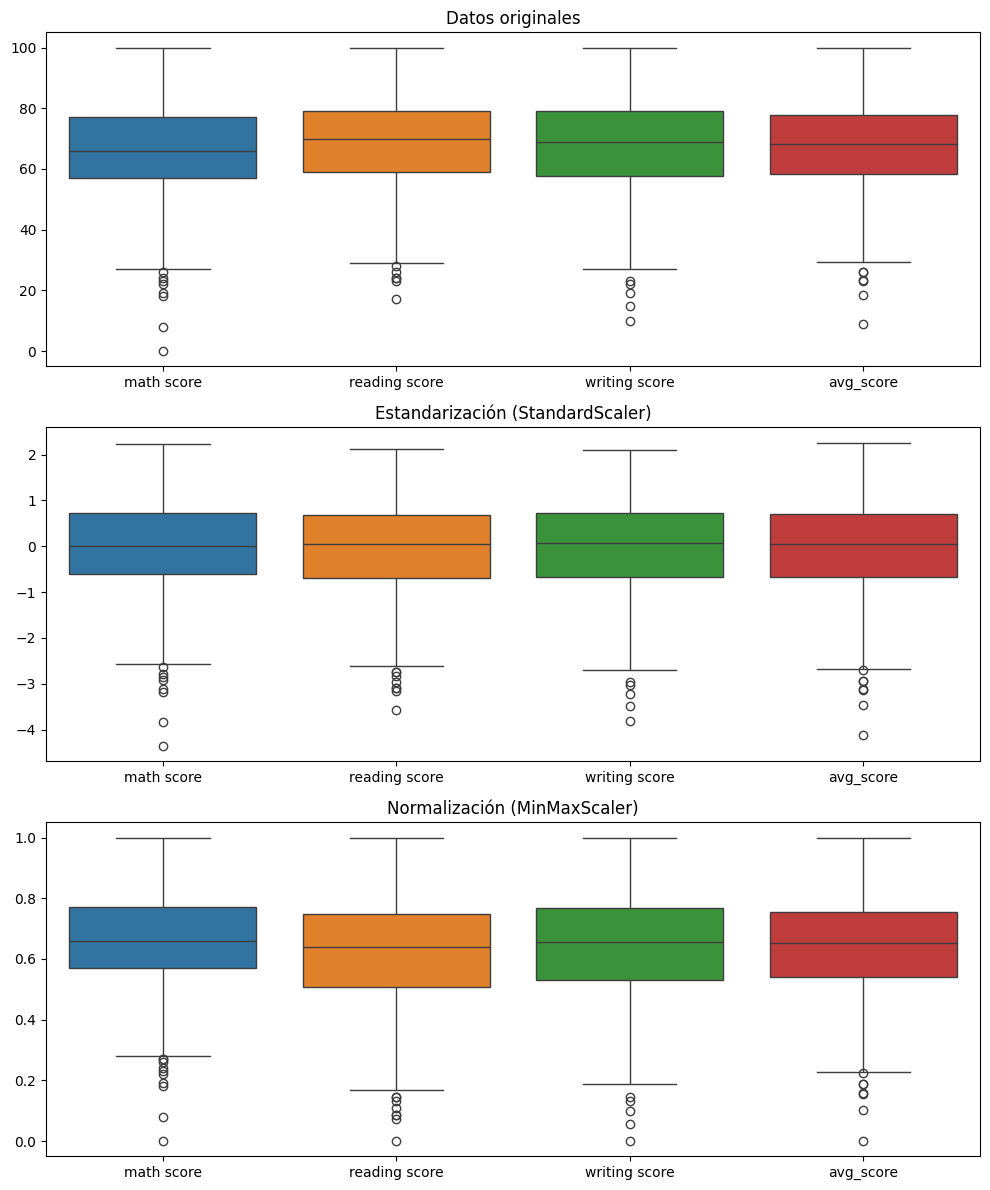

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columnas numéricas a transformar
num_cols = ['math score', 'reading score', 'writing score', 'avg_score']

scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])

scaler_minmax = MinMaxScaler()
df_norm = df.copy()
df_norm[num_cols] = scaler_minmax.fit_transform(df[num_cols])

# Gráficos antes y después
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Original
sns.boxplot(data=df[num_cols], ax=axes[0])
axes[0].set_title('Datos originales')

# Estandarizados
sns.boxplot(data=df_std[num_cols], ax=axes[1])
axes[1].set_title('Estandarización (StandardScaler)')

# Normalizados
sns.boxplot(data=df_norm[num_cols], ax=axes[2])
axes[2].set_title('Normalización (MinMaxScaler)')

plt.tight_layout()
plt.show()


## Comparación de Escalado de Variables Numéricas

Este gráfico muestra cómo se comportan las variables numéricas (`math score`, `reading score`, `writing score`, `avg_score`) antes y después de aplicar técnicas de escalado.

### 1. Datos originales

- Las variables están en su escala original (0 a 100).
- Se observan valores atípicos (outliers) especialmente en la parte baja de las distribuciones.
- Las escalas son comparables entre sí, ya que todas las variables representan puntajes.

### 2. Estandarización (StandardScaler)

- Transforma las variables para que tengan media = 0 y desviación estándar = 1.
- Centra las distribuciones en cero, facilitando la comparación entre formas y dispersión.
- Resalta con mayor claridad los valores atípicos, al mostrar qué tan lejos están de la media estándar.

### 3. Normalización (MinMaxScaler)

- Escala los valores al rango [0, 1].
- Igualiza la escala de todas las variables, evitando que alguna domine visualmente sobre otra.
- Útil para algoritmos sensibles a la magnitud de los datos, como redes neuronales o k-NN.

### Conclusión

Aplicar técnicas de escalado permite:

- Comparar variables que están en diferentes rangos de forma justa.
- Detectar patrones o outliers con mayor facilidad.
- Preparar los datos para análisis posteriores como clustering, PCA o modelos predictivos.
